# What is the best rate?

# Introduction

You work as a Data analyst for the telecommunications operator Megaline. The company offers its customers two prepaid tariffs, Surf and Ultimate. The sales department wants to know which of the tariffs generates the most revenue in order to adjust the advertising budget.

You will carry out a preliminary analysis of the tariffs based on a relatively small selection of customers. You will have the data of 500 Megaline customers: who the customers are, where they are from, which tariff they use, as well as the number of calls they made and text messages they sent in 2018. Your job is to analyse the behaviour of the customers and determine which prepaid tariff generates the most revenue.

## Objective
Project carried out with the main objective of developing the best strategy in budget allocation for advertising campaigns.

The sample of customers provided will be prepared and the necessary statistical tests will be applied to it in order to obtain valuable knowledge for our purposes by analysing the data.

## Initialization

In [1]:
# Load all libraries
import pandas as pd #Pandas library for dataset creation and manipulation
import numpy as np #Numpy library for scientific computing functions
import seaborn as sns #Seaborn library for box-and-whisker plot visualization
from matplotlib import pyplot as plt #Pyplot for graph visualization
from math import factorial #Factorial for factorial calculation
from scipy import stats as st #Scipy for statistical functions

## Load data

In [2]:
# Load the data files into different DataFrames
df_users = pd.read_csv('megaline_users.csv')
df_calls = pd.read_csv('megaline_calls.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_plans = pd.read_csv('megaline_plans.csv')

# Data preparation

## Rates

In [3]:
# Print general/summary information about the rates DataFrame
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Print a sample of the data for the rates
print(df_plans.sample(2))

   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  
0               20          10             0.03            0.03      surf  


The variable name "usd_monthly_pay" will be changed to "usd_monthly_fee" to match the one provided in the data dictionary

Also, the mb_per_month_included column will be changed to show GB instead of MB

In [5]:
#Transforming the column from Mb to Gb
df_plans['mb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

#Renaming the column
new_names = {
  'usd_monthly_pay' : 'usd_monthly_fee',
  'mb_per_month_included' : 'gb_per_month_included'
}

df_plans.rename(columns = new_names, inplace = True)

print(df_plans.head())

   messages_included  gb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Users

In [6]:
# Print general/summary information about the users DataFrame
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Print a sample of data for users
print(df_users.sample(5))

#Checking for duplicate values
print()
print('Duplicate values: ', df_users.duplicated().sum())

     user_id first_name last_name  age  \
34      1034         Jc    Gentry   22   
187     1187     Tanner   Goodman   49   
12      1012    Jonelle   Mcbride   59   
346     1346      Emmie  Gonzalez   59   
176     1176   Terrance   Shaffer   75   

                                          city    reg_date      plan  \
34   New York-Newark-Jersey City, NY-NJ-PA MSA  2018-08-13      surf   
187       Austin-Round Rock-Georgetown, TX MSA  2018-02-20      surf   
12      Chicago-Naperville-Elgin, IL-IN-WI MSA  2018-06-28      surf   
346                             Tucson, AZ MSA  2018-04-26  ultimate   
176  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-10-03      surf   

     churn_date  
34          NaN  
187         NaN  
12   2018-11-16  
346         NaN  
176         NaN  

Duplicate values:  0


The data types of the following variables will be changed: </n>
- user_id: Currently int, it will be changed to object, it is not a variable with which we are going to do calculations.
- reg_date and churn_date: Currently object, they will be changed to datetime data type with the appropriate format. </n>

There are no duplicate values.

There are missing values in the churn_date column, but we can keep them as NaN.

In [8]:
#Convert user_id to object data type
df_users['user_id'] = df_users['user_id'].astype('object')

#Convert reg_date and churn_date to datetime data type
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

#Validating conversion
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


## Calls

In [9]:
# Print general/summary information about the DataFrame calls
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Print a sample of data for the calls
print(df_calls.sample(5))
#Checking for duplicate values
print()
print('Duplicate values: ', df_calls.duplicated().sum())

             id  user_id   call_date  duration
82122   1296_10     1296  2018-12-13      9.06
46639   1170_72     1170  2018-10-18      0.00
79874    1286_0     1286  2018-12-24      2.97
106990  1380_14     1380  2018-11-03      4.81
937     1005_28     1005  2018-12-26      0.00

Duplicate values:  0


The data types of the following variables will be changed:
- user_id: Currently int, it will be changed to object, it is not a variable with which we are going to do calculations.
- call_date: Currently object, they will be changed to datetime data type with the appropriate format.

There are no duplicate values

Since the duration of calls is counted by minute, rounding the seconds up, a column will be added with the duration of the calls converted to integer with the seconds rounded.

In [11]:
#Convert user_id to object data type
df_calls['user_id'] = df_calls['user_id'].astype('object')

#Convert call_date to datetime data type
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

#Validating conversion
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


## Messages

In [12]:
# Print general/summary information about the messages DataFrame
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# Print a sample of data for messages
print(df_messages.sample(5))
#Checking for duplicate values
print()
print('Duplicate values: ', df_messages.duplicated().sum())

             id  user_id message_date
49471  1328_429     1328   2018-12-27
24500  1145_355     1145   2018-08-08
53248  1339_382     1339   2018-06-11
45060  1302_165     1302   2018-10-18
12104  1080_107     1080   2018-10-25

Duplicate values:  0


The data types of the following variables will be changed: </n>
- user_id: Currently int, it will be changed to object, it is not a variable with which we are going to do calculations.
- message_date: Currently object, they will be changed to datetime data type with the appropriate format.

There are no duplicate values

In [14]:
#Convert user_id to object data type
df_messages['user_id'] = df_messages['user_id'].astype('object')

#Convert message_date to datetime data type
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

#Validating conversion
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


## Internet

In [15]:
# Print general/summary information about the internet DataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
# Print a sample of data for internet traffic
print(df_internet.sample(5))
#Checking for duplicate values
print()
print('Duplicate values: ', df_internet.duplicated().sum())

             id  user_id session_date  mb_used
62417    1285_9     1285   2018-10-12   620.95
86462  1401_160     1401   2018-10-08     0.00
3996   1022_407     1022   2018-12-11   116.54
15283   1069_96     1069   2018-10-18     0.00
18517  1082_242     1082   2018-11-09   681.40

Duplicate values:  0


The data types of the following variables will be modified:
- user_id: Currently int, it will be changed to object, it is not a variable with which we are going to do calculations.
- session_date: Currently object, they will be changed to datetime data type with the appropriate format.

There are no duplicate values

As for calls, it is considered useful to add a column with the mb consumption rounded up and converted to integer.

In [17]:
#Convert user_id to object data type
df_internet['user_id'] = df_internet['user_id'].astype('object')

#Convert session_date to datetime data type
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

#Validating conversion
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


## Feature engineering for calls and internet

In [18]:
#Creating new column with seconds rounded in df_calls
df_calls['duration_int'] = np.ceil(df_calls['duration']).astype('int')
#Validating new column
print(df_calls.sample(5))

              id user_id  call_date  duration  duration_int
125995  1446_111    1446 2018-12-24      3.19             4
62205   1223_380    1223 2018-11-11      1.72             2
11683   1050_458    1050 2018-12-04      9.34            10
115350  1404_144    1404 2018-08-31      9.81            10
17227   1066_335    1066 2018-10-08     21.56            22


In [19]:
#Creating new column with mb rounded in df_internet
df_internet['mb_used_int'] = np.ceil(df_internet['mb_used']).astype('int')
#Validating new column
print(df_internet.sample(5))

             id user_id session_date  mb_used  mb_used_int
39264   1176_85    1176   2018-10-21   495.69          496
10953  1054_492    1054   2018-12-14   366.99          367
60934  1277_237    1277   2018-09-06   299.27          300
75994   1358_75    1358   2018-07-11   145.50          146
89131   1411_25    1411   2018-12-15     0.00            0


# Data analysis

## Studying the fee conditions

In [20]:
# Print the conditions of the rate

print('SURF PLAN')
surf = df_plans[df_plans['plan_name'] == 'surf'] # Extracting row from surf plan
print('Monthly payment: ', surf.iloc[0].loc['usd_monthly_fee'])
print('INCLUDES')
print('Minutes: ', surf.iloc[0].loc['minutes_included'])
print('Messages: ', surf.iloc[0].loc['messages_included'])
print('GB: ', surf.iloc[0].loc['gb_per_month_included'] / 1024)
print('ADDITIONAL')
print('USD per additional minute: ', surf.iloc[0].loc['usd_per_minute'])
print('USD per message additional: ', surf.iloc[0].loc['usd_per_message'])
print('USD per additional GB: ', surf.iloc[0].loc['usd_per_gb'])

print()
print('ULTIMATE PLAN')
ultimate = df_plans[df_plans['plan_name'] == 'ultimate'] #Extracting row from ultimate plan
print('Monthly payment: ', ultimate.iloc[0].loc['usd_monthly_fee'])
print('INCLUDES')
print( 'Minutes: ', ultimate.iloc[0].loc['minutes_included'])
print('Messages: ', ultimate.iloc[0].loc['messages_included'])
print('GB: ', ultimate.iloc [0].loc['gb_per_month_included']/ 1024)
print('ADDITIONAL')
print('USD per additional minute: ', ultimate.iloc[0].loc['usd_per_minute'])
print('USD per additional message: ', ultimate.iloc[0].loc['usd_per_message'])
print('USD per additional GB: ', ultimate.iloc[0].loc['usd_per_gb'])

SURF PLAN
Monthly payment:  20
INCLUDES
Minutes:  500
Messages:  50
GB:  0.0146484375
ADDITIONAL
USD per additional minute:  0.03
USD per message additional:  0.03
USD per additional GB:  10

ULTIMATE PLAN
Monthly payment:  70
INCLUDES
Minutes:  3000
Messages:  1000
GB:  0.029296875
ADDITIONAL
USD per additional minute:  0.01
USD per additional message:  0.01
USD per additional GB:  7


## What is the number of calls made by each user per month?

In [21]:
#Creating temporary column with the month of each call
df_calls['month'] = df_calls['call_date'].dt.month

#Grouping by user_id and month columns
calls_per_user_month = df_calls.groupby(['user_id', 'month']).count()

#Renaming id column to calls, indicates the number of calls for that user in that month
new_names = {
  'id' : 'calls',
}
calls_per_user_month.rename(columns = new_names, inplace = True)

#We get a dataframe grouped by user_id and month with the number of calls made
print(calls_per_user_month)
print()
print("Average number of calls per user per month: ", calls_per_user_month['calls'].mean())

               calls  call_date  duration  duration_int
user_id month                                          
1000    12        16         16        16            16
1001    8         27         27        27            27
        9         49         49        49            49
        10        65         65        65            65
        11        64         64        64            64
...              ...        ...       ...           ...
1498    12        39         39        39            39
1499    9         41         41        41            41
        10        53         53        53            53
        11        45         45        45            45
        12        65         65        65            65

[2258 rows x 4 columns]

Average number of calls per user per month:  60.99867139061116


## What is the number of minutes used by each user per month?

In [22]:
#Grouping by user_id and month columns
minutes_per_user_month = df_calls.groupby(['user_id', 'month'])[df_calls.select_dtypes(include='number').columns].sum()

#Renaming duration_int column to minutes, indicating the number of minutes for that user in that month
new_names = {
  'duration_int' : 'minutes',
}
minutes_per_user_month.rename(columns = new_names, inplace = True)

#We get a dataframe grouped by user_id and month with the sum of the minutes used
print(minutes_per_user_month)
print()
print("Average number of minutes per user per month: ", minutes_per_user_month['minutes'].mean())

               duration  minutes  month
user_id month                          
1000    12       116.83      124    192
1001    8        171.14      182    216
        9        297.69      315    441
        10       374.11      393    650
        11       404.59      426    704
...                 ...      ...    ...
1498    12       324.77      339    468
1499    9        330.37      346    369
        10       363.28      385    530
        11       288.56      308    495
        12       468.10      496    780

[2258 rows x 3 columns]

Average number of minutes per user per month:  435.9375553587245


## What is the number of messages sent by each user per month?

In [23]:
#Creating temporary column with the month of each message
df_messages['month'] = df_messages['message_date'].dt.month

#Grouping by user_id and cmonth columns
messages_per_user_month = df_messages.groupby(['user_id', 'month']).count()

#Renaming id column to messages, indicates the number of messages for that user in that month
new_names = {
  'id' : 'messages',
}
messages_per_user_month.rename(columns = new_names, inplace = True)

#We get a dataframe grouped by user_id and month with the number of messages sent
print(messages_per_user_month)
print()
print("Average number of messages per user per month: ", messages_per_user_month['messages'].mean())

               messages  message_date
user_id month                        
1000    12           11            11
1001    8            30            30
        9            44            44
        10           53            53
        11           36            36
...                 ...           ...
1496    9            21            21
        10           18            18
        11           13            13
        12           11            11
1497    12           50            50

[1806 rows x 2 columns]

Average number of messages per user per month:  42.110188261351055


## What is the volume of Internet traffic used by each user per month?

In [24]:
#Creating a temporary column with the month of each session
df_internet['month'] = df_internet['session_date'].dt.month

#Grouping by the user_id and cmot columns
mbs_per_user_month = df_internet.groupby(['user_id', 'month'])[df_internet.select_dtypes(include='number').columns].sum()

#We get a dataframe grouped by user_id and month with the number of messages sent
print(mbs_per_user_month)
print()
print("Average number of mbs per user per month: ", mbs_per_user_month['mb_used'].mean())

                mb_used  mb_used_int  month
user_id month                              
1000    12      1901.47         1903     60
1001    8       6919.15         6929    200
        9      13314.82        13333    477
        10     22330.49        22356    560
        11     18504.30        18524    561
...                 ...          ...    ...
1498    12     23137.69        23160    780
1499    9      12984.76        13004    405
        10     19492.43        19515    610
        11     16813.83        16834    539
        12     22059.21        22091    780

[2277 rows x 3 columns]

Average number of mbs per user per month:  16882.197501097933


## Merging call, minute, message, internet and plan type data based on user_id and month

In [25]:
#Merging data based on their indexes
data_per_user = pd.concat([calls_per_user_month, 
                           minutes_per_user_month, 
                           messages_per_user_month, 
                           mbs_per_user_month], 
                          axis='columns')
#Removing unnecessary columns
data_per_user = data_per_user[['calls','minutes', 'messages','mb_used_int']]

#Renaming column mb_used_int to mb_used, indicating the number of messages for that user in that month
new_names = {
  'mb_used_int' : 'mb_used',
}
data_per_user.rename(columns = new_names, inplace = True)

#Replacing all NaNs with 0 and converting columns to int
data_per_user = data_per_user.where(~data_per_user.isna(), 0)
data_per_user = data_per_user.astype('int')

#Converting user_id and call_month indexes to columns with reset_index, reestablishing a normal index
data_per_user.reset_index(inplace=True)

#Merging the created dataframe with each user's plan information in Left Join
data_per_user = data_per_user.merge(df_users, on='user_id', how='left')
#Removing unnecessary columns
data_per_user = data_per_user[['user_id', 'month', 'calls','minutes', 'messages','mb_used', 'plan']]
print(data_per_user)

     user_id  month  calls  minutes  messages  mb_used      plan
0       1000     12     16      124        11     1903  ultimate
1       1001      8     27      182        30     6929      surf
2       1001      9     49      315        44    13333      surf
3       1001     10     65      393        53    22356      surf
4       1001     11     64      426        36    18524      surf
...      ...    ...    ...      ...       ...      ...       ...
2288    1349     12      0        0        61    13052      surf
2289    1361      5      0        0         2     1523      surf
2290    1482     10      0        0         2        0  ultimate
2291    1108     12      0        0         0      235  ultimate
2292    1311      6      0        0         0     1501  ultimate

[2293 rows x 7 columns]


## What is the monthly income for each user?

In [26]:
# Calculate monthly income for each user

#Function that calculates monthly income for a given row
def income(row):
    minutes = row['minutes']
    messages = row['messages']
    mb_used = row['mb_used']
    plan = row['plan']
    income = 0
    
    if plan == 'surf':
        income = 20 #Adding monthly income
        if minutes > 500:
            income += (minutes - 500) * 0.03 #Adding 0.03 for each extra minute
        if messages > 50:
            income += (messages - 50) * 0.03 #Adding 0.03 for each extra message
        if mb_used > 15360:
            income += np.ceil(((mb_used - 15360) / 1024)) * 10 #Adding 10 for each GB exceeded, using ceil to round up
            
    elif plan == 'ultimate':
        income = 70 #Agregando renta mensual
        if minutes > 3000:
            income += (minutes - 3000) * 0.01 #Adding 0.01 for each extra minute
        if messages > 1000:
            income += (messages - 1000) * 0.01 #Adding 0.01 for each extra message
        if mb_used > 30720:
            income += np.ceil(((mb_used - 30720) / 1024)) * 7 #Adding 7 for each GB exceeded, using ceil to round up
    return income

#Creating the new income_per_month column with the result of assigning each row to the income function
data_per_user['income_per_month'] = data_per_user.apply(income, axis=1)
print(data_per_user)
print("Average income per user per month - Surf: ", data_per_user.query("plan == 'surf'")['income_per_month'].mean())
print("Average income per user per month - Ultimate: ", data_per_user.query("plan == 'ultimate'")['income_per_month'].mean())


     user_id  month  calls  minutes  messages  mb_used      plan  \
0       1000     12     16      124        11     1903  ultimate   
1       1001      8     27      182        30     6929      surf   
2       1001      9     49      315        44    13333      surf   
3       1001     10     65      393        53    22356      surf   
4       1001     11     64      426        36    18524      surf   
...      ...    ...    ...      ...       ...      ...       ...   
2288    1349     12      0        0        61    13052      surf   
2289    1361      5      0        0         2     1523      surf   
2290    1482     10      0        0         2        0  ultimate   
2291    1108     12      0        0         0      235  ultimate   
2292    1311      6      0        0         0     1501  ultimate   

      income_per_month  
0                70.00  
1                20.00  
2                20.00  
3                90.09  
4                60.00  
...                ...  
2288    

# User behavior analysis

## Average call duration for each plan and for each month

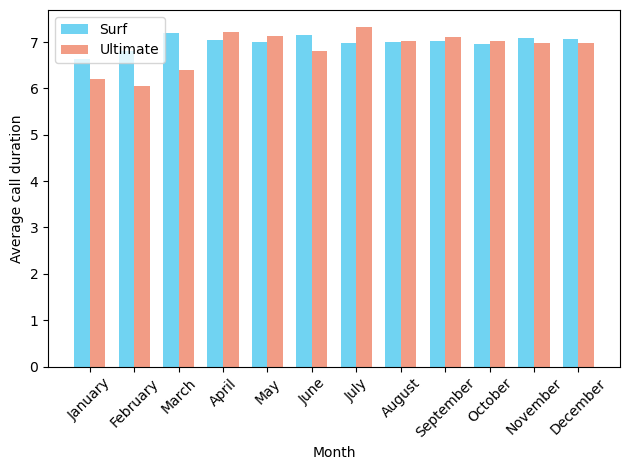

Average call duration per user per month plan surf:  7.030712408943665
Average call duration per user per month plan Ultimate:  7.00973786728741


In [27]:
import calendar

#Function that calculates the average call duration of each customer in each month
def avg_duration_call(row):
    minutes = row['minutes']
    calls = row['calls']
    if calls > 0:
        return minutes / calls #Divide the number of minutes used by the number of calls made
    return 0

#Creating the new column avg_duration_call with the result of assigning each row to the avg_duration_call function
data_per_user['avg_duration_call'] = data_per_user.apply(avg_duration_call, axis=1)

# Filtering data by plan and grouping by month
surf_call_duration = data_per_user[data_per_user['plan'] == 'surf'].groupby('month')['avg_duration_call'].mean()
ultimate_call_duration = data_per_user[data_per_user['plan'] == 'ultimate'].groupby('month')['avg_duration_call'].mean()

# Defining the width of the bars and calculating the position of the bars for each data set
bar_width = 0.35
index = range(12)

# Creating the bar chart
plt.bar(index, surf_call_duration, bar_width, color='#70D3F2', label='Surf')
plt.bar([i + bar_width for i in index], ultimate_call_duration, bar_width, color='#F29C85', label='Ultimate')

# Axis labels and legend
plt.xlabel('Month')
plt.ylabel('Average call duration')

# Get the month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December']

# Rotation of the x-axis labels
plt.xticks([i + bar_width / 2 for i in index], month_names, rotation=45)
plt.legend()

# Display the chart
plt.tight_layout() # Adjust the layout to avoid overlaps
plt.show()

print("Average call duration per user per month plan surf: ", data_per_user.query("plan == 'surf'")['avg_duration_call'].mean())
print("Average call duration per user per month plan Ultimate: ", data_per_user.query("plan == 'ultimate'")['avg_duration_call'].mean())

## Comparison of the number of monthly minutes needed by users of each plan

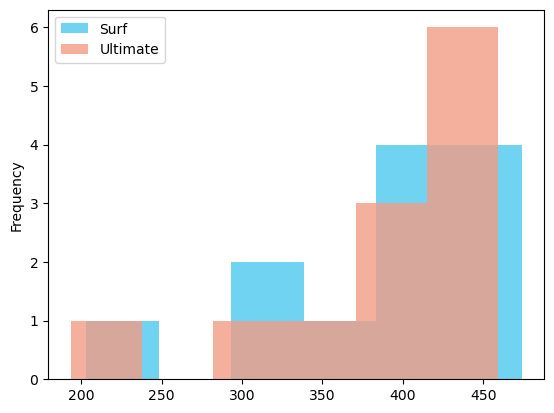

In [28]:
# Filtering data by plan and grouping by month
surf_minutes = data_per_user[data_per_user['plan'] == 'surf'].groupby('month')['minutes'].mean()
ultimate_minutes = data_per_user[data_per_user['plan'] == 'ultimate'].groupby('month')['minutes'].mean()

#Creating histogram
surf_minutes.plot(kind='hist', color='#70D3F2', bins=6)
ultimate_minutes.plot(kind='hist', bins=6, alpha=0.8, color='#F29C85')
plt.legend(['Surf', 'Ultimate'])
plt.show()

## Mean and variance of monthly call duration

In [29]:
# Calculating the mean and variance of monthly call duration.
duration_surf = data_per_user.query("plan == 'surf'") #Filtering by surf plan
duration_ultimate = data_per_user.query("plan == 'ultimate'") #Filtering by ultimate plan

print("Monthly call duration")
print("Surf plan mean: ", duration_surf['avg_duration_call'].mean())
print("Ultimate plan mean: ", duration_ultimate['avg_duration_call'].mean())
print("Surf plan variance: ", np.var(duration_surf['avg_duration_call']))
print("Ultimate plan variance: ", np.var(duration_ultimate['avg_duration_call']))
print("Surf plan standard deviation: ", np.sqrt(np.var(duration_surf['avg_duration_call'])))
print("Standard deviation of Ultimate: ", np.sqrt(np.var(duration_ultimate['avg_duration_call'])))

Monthly call duration
Surf plan mean:  7.030712408943665
Ultimate plan mean:  7.00973786728741
Surf plan variance:  2.1007274134149987
Ultimate plan variance:  1.3877081848847723
Surf plan standard deviation:  1.4493886343610531
Standard deviation of Ultimate:  1.1780102651865019


## Monthly distribution of calls

<Axes: xlabel='avg_duration_call', ylabel='plan'>

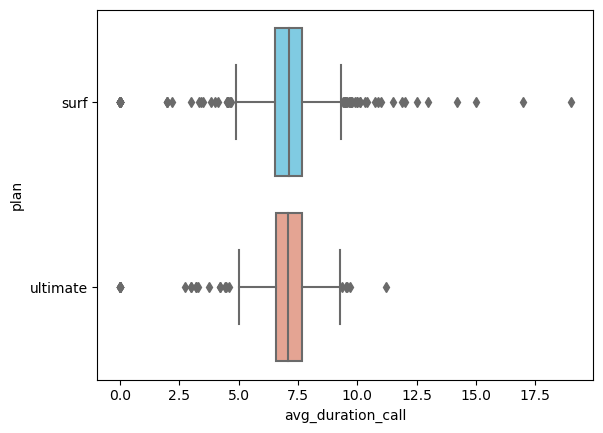

In [30]:
# Draw a box plot to visualize the distribution of monthly call duration
pal = {"surf": "#70D3F2", "ultimate": "#F29C85"}
sns.boxplot(x = data_per_user['avg_duration_call'], y = data_per_user['plan'], order=['surf','ultimate'], palette=pal)

### Call Behavior Conclusions

The number of calls made by customers gradually increases as the year progresses, the average call duration remains practically the same in both plans throughout the year with an average of between 6 and 7 minutes.

According to the histogram, the number of minutes used in both plans is very similar, users of both plans tend to stay below 500 minutes used, the limit of the Surf plan.

There is no relevant difference in the behavior in the duration of calls with respect to the plan used by customers, users present an average call duration of 7 minutes and a variation of between 1 and 2 minutes between customers for both plans.

Regarding the dispersion of the data in both plans, we see some isolated records with calls of an average of more than 12 minutes only in the Surf plan.

## Comparison of the number of messages that users of each plan tend to send each month

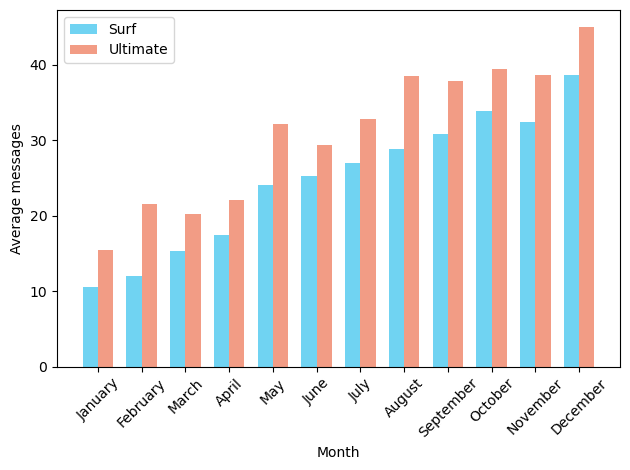

In [31]:
# Filtering messages by plan and grouping by month
surf_messages = data_per_user[data_per_user['plan'] == 'surf'].groupby('month')['messages'].mean()
ultimate_messages = data_per_user[data_per_user['plan'] == 'ultimate'].groupby('month')['messages'].mean()

# Defining the bar width and calculating the bar position for each data set
bar_width = 0.35
index = range(12)

# Creating the bar chart
plt.bar(index, surf_messages, bar_width, label='Surf', color='#70D3F2')
plt.bar([i + bar_width for i in index], ultimate_messages, bar_width, label='Ultimate', color='#F29C85')

# Axis labels and legend
plt.xlabel('Month')
plt.ylabel('Average messages')

# Rotation of the x-axis labels
plt.xticks([i + bar_width / 2 for i in index], month_names, rotation=45)
plt.legend()

# Display the chart
plt.tight_layout() # Adjust the layout to avoid overlaps
plt.show()

## Comparison of the number of monthly messages required by users of each plan

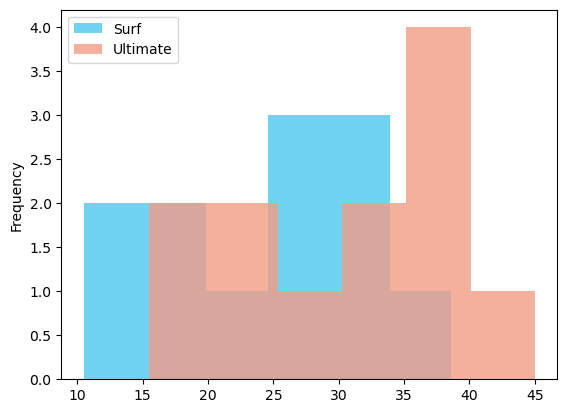

In [32]:
#Creating histogram
surf_messages.plot(kind='hist', bins=6, color="#70D3F2")
ultimate_messages.plot(kind='hist', bins=6, alpha=0.8, color="#F29C85")
plt.legend(['Surf', 'Ultimate'])
plt.show()

## Mean and variance of the number of messages

Monthly number of messages
Surf plan mean:  31.15956770502225
Ultimate plan mean:  37.55138888888889
Surf plan variance:  1126.0082317266633
Ultimate plan variance:  1207.0779147376504
Surf plan standard deviation:  33.55604612773477
Standard deviation of the Ultimate plan:  34.74302685054442


<Axes: xlabel='messages', ylabel='plan'>

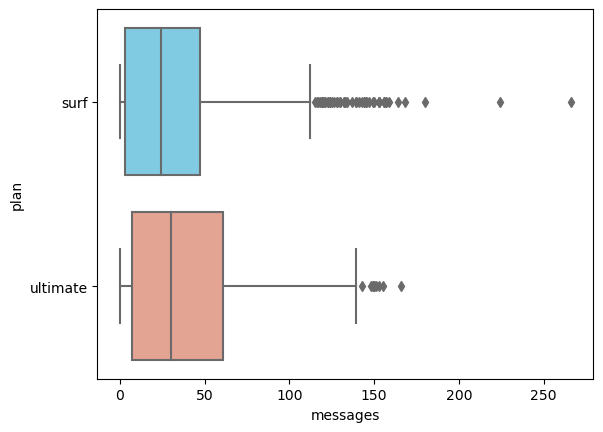

In [33]:
# Calculating the mean and variance of the number of messages
messages_surf = data_per_user.query("plan == 'surf'") #Filtering by surf plan
messages_ultimate = data_per_user.query("plan == 'ultimate'") #Filtering by ultimate plan

print("Monthly number of messages")
print("Surf plan mean: ", messages_surf['messages'].mean())
print("Ultimate plan mean: ", messages_ultimate['messages'].mean())
print("Surf plan variance: ", np.var(messages_surf['messages']))
print("Ultimate plan variance: ", np.var(messages_ultimate['messages']))
print("Surf plan standard deviation: ", np.sqrt(np.var(messages_surf['messages'])))
print("Standard deviation of the Ultimate plan: ", np.sqrt(np.var(messages_ultimate['messages'])))

# Boxplot to visualize the distribution of the number of messages sent per month
sns.boxplot(x = data_per_user['messages'], y = data_per_user['plan'],order=['surf','ultimate'], palette=pal)

### Behavioral Conclusions in Messages

As with calls, the number of messages sent by customers gradually increases as the year progresses

According to the histogram, there is a variation between the number of messages sent by each plan, users of the Ultimate plan mostly concentrate between 35 and 40 messages while for the Surf plan the number of messages usually fluctuates between 25 and 35 messages

By calculating the average number of messages, we find what was already predicted in the histogram, the average number of messages sent by the Ultimate plan (37) is greater than the average number sent by Surf plan customers (31).
The standard deviation in both plans is very similar (around 34), very similar to the average of both plans, which suggests a high dispersion of the data.

The box and whisker diagrams show a high dispersion of the data, the number of messages sent by customers of both plans, mainly the Surf plan, varies greatly from customer to customer.

## Comparison of the amount of Internet traffic consumed by users per plan

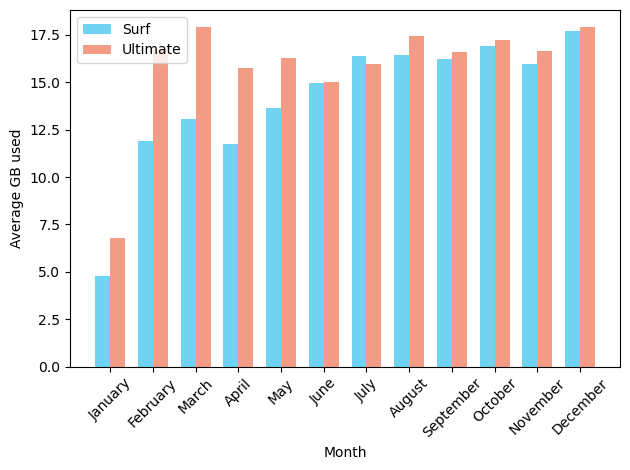

In [34]:
#Creating new column to present data by Gb
data_per_user['gb_used'] = data_per_user['mb_used'] / 1024

# Filtering data by plan and grouping by month
surf_gb_consumption = data_per_user[data_per_user['plan'] == 'surf'].groupby('month')['gb_used'].mean()
ultimate_gb_consumption = data_per_user[data_per_user['plan'] == 'ultimate'].groupby('month')['gb_used'].mean()

# Defining the width of the bars and calculating the position of the bars for each data set
bar_width = 0.35
index = range(12)

# Creating the bar chart
plt.bar(index, surf_gb_consumption, bar_width, label='Surf', color='#70D3F2')
plt.bar([i + bar_width for i in index], ultimate_gb_consumption, bar_width, label='Ultimate', color='#F29C85')

# Axis labels and legend
plt.xlabel('Month')
plt.ylabel('Average GB used')

# Rotation of x-axis labels
plt.xticks([i + bar_width / 2 for i in index], month_names, rotation=45)
plt.legend()

# Display the chart
plt.tight_layout() # Adjust the layout to avoid overlaps
plt.show()

## Comparison of the number of monthly GB needed by users of each plan

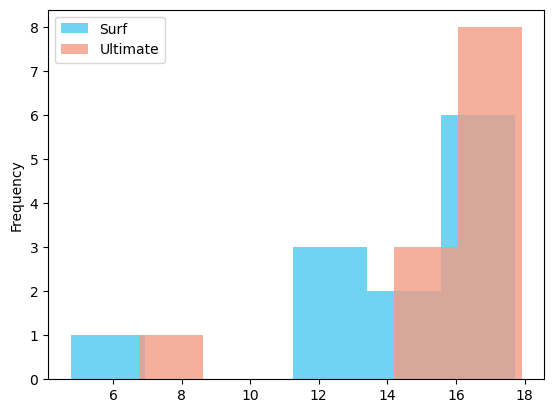

In [35]:
#Creating histogram
surf_gb_consumption.plot(kind='hist', bins=6, color="#70D3F2")
ultimate_gb_consumption.plot(kind='hist', bins=6, alpha=0.8, color="#F29C85")
plt.legend(['Surf', 'Ultimate'])
plt.show()

## Mean and variance of the amount of Mb used

Monthly amount of Gb used
Surf plan mean:  16.189214106206293
Ultimate plan mean:  16.830706108940973
Surf plan variance:  61.32384794273391
Ultimate plan variance:  58.82236217825319
Surf plan standard deviation:  7.830954472012586
Standard deviation of the Ultimate plan:  7.669573793781059


<Axes: xlabel='gb_used', ylabel='plan'>

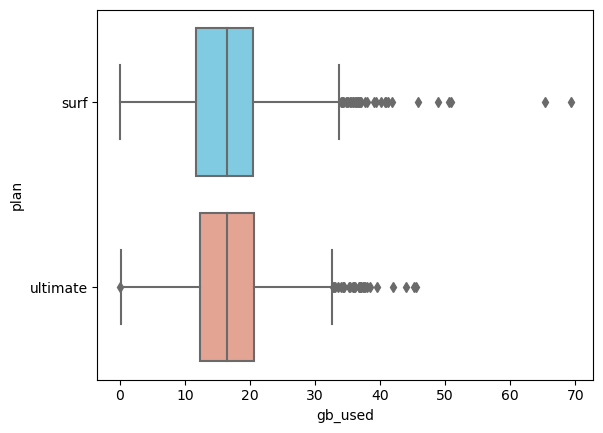

In [36]:
# Calculating the mean and variance of the amount of Mb used
gb_used_surf = data_per_user.query("plan == 'surf'") #Filtering by surf plan
gb_used_ultimate = data_per_user.query("plan == 'ultimate'") #Filtering by ultimate plan

print("Monthly amount of Gb used")
print("Surf plan mean: ", gb_used_surf['gb_used'].mean())
print("Ultimate plan mean: ", gb_used_ultimate['gb_used'].mean())
print("Surf plan variance: ", np.var(gb_used_surf['gb_used']))
print("Ultimate plan variance: ", np.var(gb_used_ultimate['gb_used']))
print("Surf plan standard deviation: ", np.sqrt(np.var(gb_used_surf['gb_used'])))
print("Standard deviation of the Ultimate plan: ", np.sqrt(np.var(gb_used_ultimate['gb_used'])))

# Boxplot to visualize the distribution of the amount of GB used per month
sns.boxplot(x = data_per_user['gb_used'], y = data_per_user['plan'],order=['surf','ultimate'], palette=pal)

### Conclusions on Internet behavior

Internet consumption gradually increases as the year progresses. Many Surf plan users tend to exceed the Gb included in their plan in the second half of the year.

According to the histogram, there is a slight variation between the amount of GB used by each plan, Ultimate plan users are mostly concentrated between 15 and 18 GB while for the Surf plan the amount usually ranges between 12 and 17 Gb.

Both plans present an average of 16 Gb of consumption by their users, the data dispersion is slightly high, with a standard deviation of 8 Gb for both plans.

The box and whisker diagrams show customers with atypical internet consumption values ​​in the Surf plan.

## Average revenue per plan

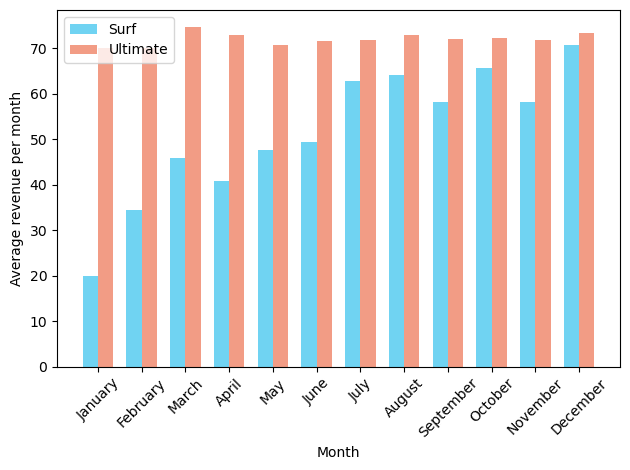

In [37]:
# Filtering data by plan and grouping by month
surf_income = data_per_user[data_per_user['plan'] == 'surf'].groupby('month')['income_per_month'].mean()
ultimate_income = data_per_user[data_per_user['plan'] == 'ultimate'].groupby('month')['income_per_month'].mean()

# Defining the bar width and calculating the bar position for each data set
bar_width = 0.35
index = range(12)

# Creating the bar chart
plt.bar(index, surf_income, bar_width, label='Surf', color='#70D3F2')
plt.bar([i + bar_width for i in index], ultimate_income, bar_width, label='Ultimate', color='#F29C85')

# Axis labels and legend
plt.xlabel('Month')
plt.ylabel('Average revenue per month')

# Rotation of x-axis labels
plt.xticks([i + bar_width / 2 for i in index], month_names, rotation=45)
plt.legend()

# Display the chart
plt.tight_layout() # Adjust the layout to avoid overlaps
plt.show()

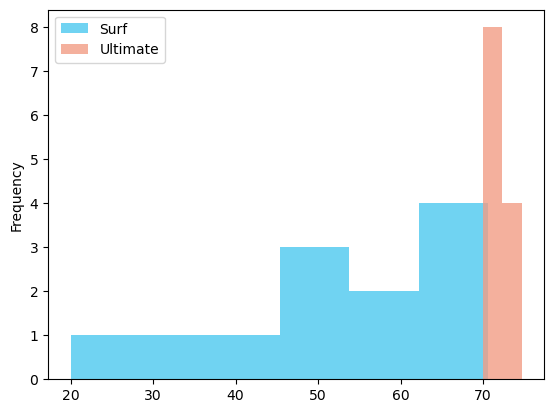

In [38]:
#Creating histogram
surf_income.plot(kind='hist', bins=6, color="#70D3F2")
ultimate_income.plot(kind='hist', bins=2, alpha=0.8, color="#F29C85")
plt.legend(['Surf', 'Ultimate'])
plt.show()

## Mean and variance of monthly income

Monthly income
Surf plan mean:  60.79541004450095
Ultimate plan mean:  72.33333333333333
Surf plan variance:  3072.784872765757
Ultimate plan variance:  132.0277777777745
Surf plan standard deviation:  55.432705804116736
Standard deviation of the Ultimate plan:  11.490334102095312


<Axes: xlabel='income_per_month', ylabel='plan'>

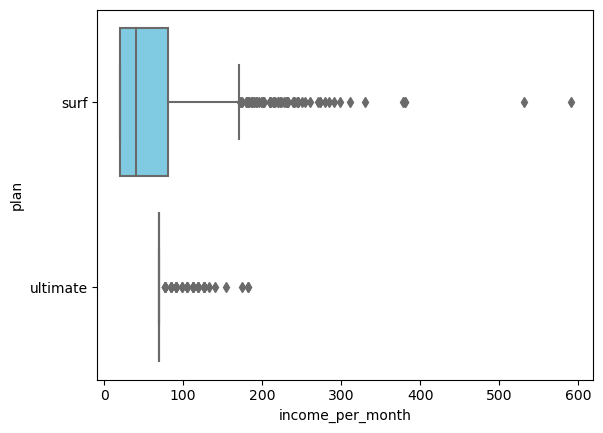

In [39]:
# Calculating the mean and variance of monthly income
income_surf = data_per_user.query("plan == 'surf'") #Filtering by surf plan
income_ultimate = data_per_user.query("plan == 'ultimate'") #Filtering by ultimate plan

print("Monthly income")
print("Surf plan mean: ", income_surf['income_per_month'].mean())
print("Ultimate plan mean: ", income_ultimate['income_per_month'].mean())
print("Surf plan variance: ", np.var(income_surf['income_per_month']))
print("Ultimate plan variance: ", np.var(income_ultimate['income_per_month']))
print("Surf plan standard deviation: ", np.sqrt(np.var(income_surf['income_per_month'])))
print("Standard deviation of the Ultimate plan: ", np.sqrt(np.var(income_ultimate['income_per_month'])))

# Boxplot to visualize the distribution of monthly income
#sns.boxplot(x = data_per_user['income_per_month'])
sns.boxplot(x = data_per_user['income_per_month'], y = data_per_user['plan'],order=['surf','ultimate'], palette=pal)

### Behavioral Conclusions by Income

The first graph suggests that many Surf plan users tend to exceed the limits included in their plan, since with the exception of January, the average Surf plan income is higher than the base rate of 20 in all months.

Surf plan users' income is usually between 45 and 70, with some even exceeding the base rate of the Ultimate plan.

The average income of Ultimate plan users is 72.33 and Surf plan users are 60.79
The standard deviation of the Ultimate plan is 11.49 while Surf plan users are 55.43

As expected, the data dispersion is high, especially in the Surf plan, with several customers exceeding 100 in income.

## Statistical hypothesis testing

In [40]:
# Test the hypotheses
"""
    H0: Average revenue from users across plans is equal.
    H1: Average revenue from users across plans differs.
"""
#Defining alpha and applying t-test
alpha = 0.05
results = st. ttest_ind(income_surf['income_per_month'], income_ultimate['income_per_month']) # perform a test

print('p-value: ', results. pvalue) # extract the p-value

if results. pvalue < alpha: # compare the p-value to the threshold
    print("We reject the null hypothesis, revenue does differ across plans.")
else:
    print("We cannot reject the null hypothesis, revenue does not differ across plans.")

p-value:  3.596177345135958e-08
We reject the null hypothesis, revenue does differ across plans.


In [41]:
# Test the hypotheses
"""
    H0: Average revenue from users in the NY-NJ area is the same as users in other regions
    H1: Average revenue from users in the NY-NJ area differs from users in other regions.
"""
#Filtering
ids = df_users[df_users['city'].str.contains('NY-NJ')] #Getting user ids from NY-NJ
users_ny_nj = data_per_user.query("user_id in @ids.user_id") #Filtering data_per_user with ids
users_not_ny_nj = data_per_user.query("user_id not in @ids.user_id")#Filtering data_per_user with ids from non-NY-NJ

#Defining alpha and applying t-test
alpha = 0.05
results = st. ttest_ind(users_ny_nj['income_per_month'], users_not_ny_nj['income_per_month'])

# Extracting p-value
print('p-value: ', results. pvalue) # extracting p-value

if results. pvalue < alpha: # comparing p-value to threshold
    print("We reject the null hypothesis, income does differ between users from NY-NJ and other regions.")
else:
    print("We cannot reject the null hypothesis, income does not differ between users from NY-NJ and other regions.")

p-value:  0.044400408636489294
We reject the null hypothesis, income does differ between users from NY-NJ and other regions.


# **Conclusion: Optimizing Budget Allocation for Megaline's Advertising Campaigns**  

The analysis of customer behavior for the **Surf** and **Ultimate** prepaid plans provides key insights for optimizing advertising budget allocation.  

### **1. Customer Usage Patterns**  
- **Calls:** Both plans show similar calling behavior, with an average **call duration of 7 minutes**, and most users staying within the **500-minute limit** of the Surf plan.  
- **Messages:** Ultimate plan users send **slightly more messages** (37 vs. 31 on average), but overall messaging usage is low, with high variability among customers.  
- **Internet Data:** Users of both plans consume around **16 GB per month**, with many Surf users **exceeding their data limits**, especially in the second half of the year.  

### **2. Revenue Insights & Plan Performance**  
- **Surf plan users frequently exceed their limits**, generating additional charges. Their average monthly revenue (USD 60.79) is **three times the base rate (USD 20)**, sometimes even surpassing the base rate of the Ultimate plan (USD 70).  
- **Ultimate plan revenue is more stable**, averaging USD 72.33 with **lower variability** compared to the Surf plan.  
- **Significant revenue differences exist by region**, particularly in the **NY-NJ area**, suggesting market-specific factors affecting revenue generation.  

### **3. Advertising Strategy Recommendations**  
- **Target High-Data Users in the Surf Plan:** Since many exceed their limits, promoting the Ultimate plan as a **cost-effective alternative** could encourage upgrades.  
- **Regional Focus on NY-NJ:** Given revenue differences, **customized regional marketing campaigns** could enhance profitability in high-revenue areas.  
- **Emphasize Data Over Calls & Messages:** As messaging use is low and calling patterns remain stable, promotional efforts should focus on **data-driven plans and additional benefits for heavy users**.  

## **Final Recommendation**  
Megaline should allocate **more advertising budget toward promoting data usage and plan upgrades**, especially targeting Surf plan users who frequently exceed their limits. Additionally, leveraging **regional marketing strategies** can maximize revenue potential in key areas like NY-NJ.

